In [1]:
data12 = pd.read_csv('submit12.csv', index_col=0)
data12

/Users/a0082273/.pyenv/versions/miniconda3-latest/lib/python3.6/site-packages/numpy/lib/arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,0.33
0,
1,2.64
2,4.96
3,5.94
4,5.03
5,1.68
6,-3.16
7,-7.12
8,-8.85
9,-7.41


In [2]:
data11 = pd.read_csv('submit11_lgbm.csv', index_col=0)
data11

,0.52
0,
1,2.64
2,4.96
3,5.87
4,5.07
5,1.68
6,-3.09
7,-7.23
8,-8.83
9,-7.42


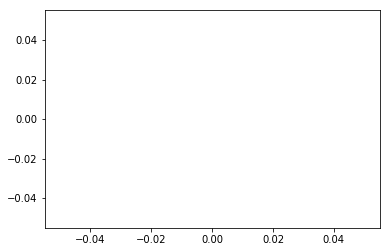

In [5]:
plt.plot(range(len(data11)), data11 - data12)

In [9]:
sum11 = pd.read_csv('summary11_A.csv', index_col=0)
sum11

,路線,キロ程,傾き,切片,標本標準偏差,測定回数,データ数
0,A,10000,-0.003067,0,3.795202,261,76
1,A,10001,-0.002222,0,3.165688,260,105
2,A,10002,-0.003625,0,3.497406,259,54
3,A,10003,0.000199,0,4.083893,259,55
4,A,10004,0.002985,0,3.805207,261,57
5,A,10005,0.000586,0,2.261965,261,71
6,A,10006,-0.000215,0,2.588153,257,56
7,A,10007,0.003765,0,4.033433,255,83
8,A,10008,0.001148,0,4.599720,251,101
9,A,10009,-0.001019,0,3.482811,251,76


In [10]:
sum12 = pd.read_csv('summary12_A.csv', index_col=0)
sum12

,路線,キロ程,傾き,切片,標本標準偏差,測定回数,データ数
0,A,10000,-0.003067,0,3.795202,261,76
1,A,10001,-0.002222,0,3.165688,260,105
2,A,10002,-0.003625,0,3.497406,259,54
3,A,10003,0.000199,0,4.083893,259,55
4,A,10004,0.002985,0,3.805207,261,57
5,A,10005,0.000586,0,2.261965,261,71
6,A,10006,-0.000215,0,2.588153,257,56
7,A,10007,0.003765,0,4.033433,255,83
8,A,10008,0.001148,0,4.599720,251,101
9,A,10009,-0.001019,0,3.482811,251,76


In [3]:
tracks={}
for no in ['A','B','C','D']:
    tracks[no] = pd.read_csv("dataset/track_" + no + ".csv", parse_dates=["date"])

In [2]:
summarys = {}
for no in ['A','B','C','D']:
    summarys[no] = pd.read_csv("summary4_" + no + ".csv", index_col=0)